In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
%matplotlib inline 

#importing rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#from utility import FeatureGenerator
from rdkit.Chem import PandasTools as PandasTools
from rdkit import DataStructs
from rdkit.Chem.Subshape import SubshapeBuilder,SubshapeAligner,SubshapeObjects

#importing sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [3]:
from rdkit.Chem import AllChem
from rdkit import Chem
import pandas as pd

sol = pd.read_csv('D:/python/rdkit/new222new.csv')
print(sol.head)
XY = sol.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                                                  SMILES  \
0               OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O   
1     O[C@H]1[C@H](O[C@H](CO)[C@@H](O)[C@@H]1O)O[C@]...   
2     OC[C@@H]1O[C@](CO)(O[C@@H]2O[C@@H](CO)[C@H](O)...   
3                CN1C[C@@H]2C[C@@H](C1)C3=CC=CC(=O)N3C2   
4                          CN1CC2CC(C1)C1=CC=CC(=O)N1C2   
...                                                 ...   
8433                                      O=[N+]([O-])C   
8434                                                 OC   
8435                                            S=C(N)N   
8436                                           O=C(NO)N   
8437                                            O=C(N)N   

      measured log(solubility:mol/L)  
0                               0.79  
1                               0.79  
2                               0.79  
3                               0.65  
4                               0.65  
...                        

In [4]:
y = sol.iloc[:,1]
y

0       0.79
1       0.79
2       0.79
3       0.65
4       0.65
        ... 
8433    0.26
8434    1.57
8435    0.32
8436    1.12
8437    0.96
Name: measured log(solubility:mol/L), Length: 8438, dtype: float64

In [97]:

X = []

for smile, Hlist in XY.items():
    try:
        X.append(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smile), radius=2,nBits = 2048))

    except:
        pass
X = [list(a) for a in X]
print(len(X))


8438


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=991)

In [100]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [102]:
Y_pred_train = model.predict(X_train)

In [103]:

print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (RMSE): 0.35
Coefficient of determination (R^2): 0.96


In [104]:
#predicts the X_test
Y_pred_test = model.predict(X_test)

In [105]:

print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (RMSE): 0.81
Coefficient of determination (R^2): 0.82


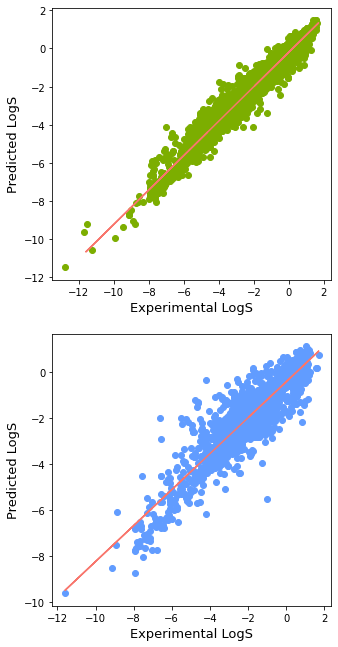

In [14]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS',fontsize=13)
plt.ylabel('Predicted LogS',fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS',fontsize=13)
plt.xlabel('Experimental LogS',fontsize=13)

#plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS morgan.pdf',dpi=1200)
plt.show()

In [106]:
import shap
from sklearn.preprocessing import StandardScaler
import os
import sys
#import Explanation

In [107]:
X = X_test
Xscaler = StandardScaler()
X2= Xscaler.fit_transform(X)
explainer = shap.TreeExplainer(model,data=X2,feature_perturbation='interventional')
shap_values = explainer.shap_values(X2)


100%|===================| 1684/1688 [07:23<00:01]        

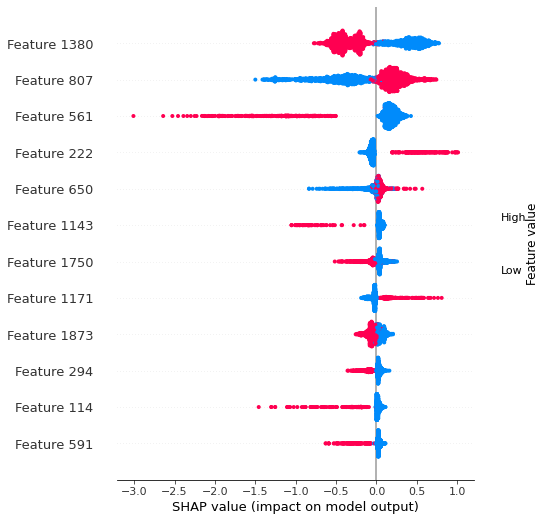

In [320]:
#shap.summary_plot(shap_values, X2,max_display=12)
#shap.summary_plot(shap_values, max_display=12,color='r')
shap.summary_plot(shap_values, X2, plot_type="dot", plot_size=0.6, show=False,max_display=12)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

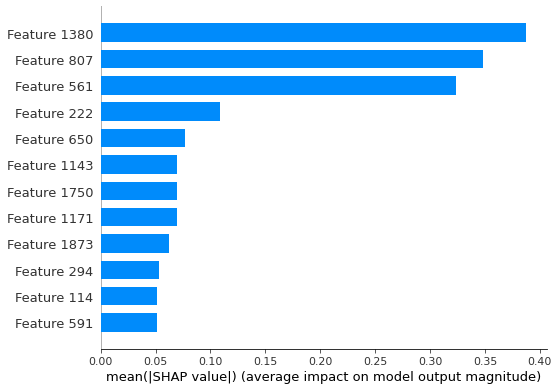

In [321]:
shap.summary_plot(shap_values, max_display=12, plot_type="bar",show=False)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

In [322]:
#vals= np.abs(shap_values).mean(0)
#feature_importance = pd.DataFrame(list(zip(X2,vals)),columns=['col_name','feature_importance_vals'])
#feature_importance["feature_importance_vals"] = np.abs(feature_importance["feature_importance_vals"])
#feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
#feature_importance.head()

import numpy as np
vals= np.abs(shap_values).mean(0)
i=12
feature_importance = pd.DataFrame(list(zip(X2[i], vals)), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance[:12]


,col_name,feature_importance_vals
1380,0.798277,0.387226
807,-1.160907,0.347999
561,-0.383065,0.323412
222,-0.322474,0.108805
650,0.836600,0.076407
1143,-0.188634,0.069769
1750,1.263694,0.069694
1171,-0.471490,0.069169
1873,0.945780,0.062422
294,-0.545402,0.052834


In [95]:
feature_importance.to_excel(r'D:/python/rdkit/File Name44.xlsx', index = False)

In [27]:
z=sol.iloc[:,0]
z

0                 OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O
1       O[C@H]1[C@H](O[C@H](CO)[C@@H](O)[C@@H]1O)O[C@]...
2       OC[C@@H]1O[C@](CO)(O[C@@H]2O[C@@H](CO)[C@H](O)...
3                  CN1C[C@@H]2C[C@@H](C1)C3=CC=CC(=O)N3C2
4                            CN1CC2CC(C1)C1=CC=CC(=O)N1C2
                              ...                        
8433                                        O=[N+]([O-])C
8434                                                   OC
8435                                              S=C(N)N
8436                                             O=C(NO)N
8437                                              O=C(N)N
Name: SMILES, Length: 8438, dtype: object

In [28]:
mol=z[1996]
mol

'[#6]CC1=C(C[#6])[NH0]=C2[NH0]=C(O)[NH0]=CC2=[NH0]1'

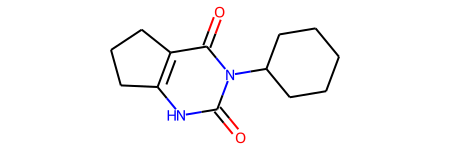

In [23]:
mol = Chem.MolFromSmiles(z[1995])
mol

In [29]:
from rdkit.Chem import rdMolDescriptors

In [422]:
w = Chem.MolFromSmiles(z[8402])
w

bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(w, radius=2, bitInfo=bi, nBits = 2048)
# show 10 of the set bits:
list(fp.GetOnBits())[:]



[44, 389, 446, 650, 807, 1917]

In [317]:
sol2 = pd.read_csv('D:/python/rdkit/testexperiment2upload2raw.csv')
print(sol2.head)
XY2 = sol2.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                              Substance                                        SMILES
0                         hexobarbital             CN1C(=O)NC(=O)C(C)(C1=O)C1=CCCCC1
1                       nalidixic_acid               CCn1cc(c(=O)c2ccc(nc12)C)C(=O)O
2                        phenantroline                        c12c(ccc3cccnc13)cccn2
3                        phenobarbital            C1(NC(C(c2ccccc2)(C(=O)N1)CC)=O)=O
4                       sulfamethazine         S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1
5                         bromogramine                    Brc1cc2c(CN(C)C)c[nH]c2cc1
6                      phenazopyridine                 c1ccc(cc1)\N=N\c1c(nc(cc1)N)N
7                           amantadine                         C1C2CC3CC(CC1C3)(N)C2
8                      benzylimidazole                            n1(Cc2ccccc2)cncc1
9                       chlorpropamide               Clc1ccc(S(=O)(NC(=O)NCCC)=O)cc1
10                          cimetid

In [318]:
#y = []
X3 = []
#bi = {}
for smile, Hlist in XY2.items():
    try:
        X3.append(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smile), radius=2,nBits = 2048))
  #      y.append(Hlist[0])
    except:
        pass
X3 = [list(c) for c in X3]
print(len(X3))


35


In [319]:
Xnew=X3
ynew = model.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
ynew

array([-2.39598452, -3.4272222 , -1.80071   , -2.33071771, -2.38303596,
       -3.92335522, -4.02061667, -2.121475  , -1.50517667, -2.8887597 ,
       -1.49360145, -2.26295   , -2.90505   , -1.95792833, -2.84261375,
       -2.5520033 , -1.1924825 , -3.27504908, -2.58238314, -2.33418333,
       -3.41979427, -0.92818266, -1.41999808, -2.78031587, -2.80345   ,
       -2.20203067, -2.88642457, -1.6865601 , -2.003575  , -1.35115913,
       -4.08115   ,  0.26140833, -1.21775933, -2.34481357, -2.26959875])

In [314]:
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(ynew)
# save to csv file
savetxt('data.csv', data, delimiter=',')

In [395]:
i=115
u=591
while i<8000:
    w = Chem.MolFromSmiles(z[i])

    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(w, radius=2, bitInfo=bi, nBits = 2048)
# show 10 of the set bits:
    j=list(fp.GetOnBits())[:]

    if u in j:
    #if a==0.97 and b==0.81:
        break
    #u=r2_score(Y_test, Y_pred_test)
    #b=round(u,2)
    
    
    i+=1
i


115

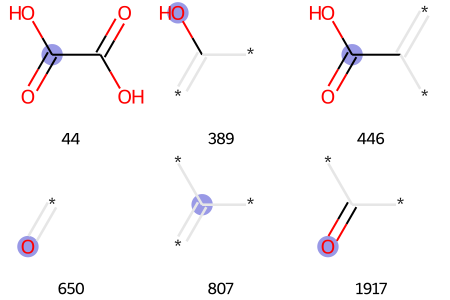

In [424]:
w = Chem.MolFromSmiles(z[8402])
w

bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(w, radius=2, bitInfo=bi, nBits = 2048)

tpls = [(w,x,bi) for x in fp.GetOnBits()]
p=Draw.DrawMorganBits(tpls[:],molsPerRow=3,legends=[str(x) for x in fp.GetOnBits()][:])
dpi=1200
p

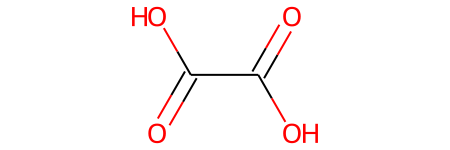

In [423]:
mol=z[2506]
mol
w = Chem.MolFromSmiles(z[8402])
w

In [400]:
def getSubstructSmi(mol,atomID,radius):
    if radius>0:
        env = Chem.FindAtomEnvironmentOfRadiusN(mol,radius,atomID)
        atomsToUse=[]
        for b in env:
            atomsToUse.append(mol.GetBondWithIdx(b).GetBeginAtomIdx())
            atomsToUse.append(mol.GetBondWithIdx(b).GetEndAtomIdx())
        atomsToUse = list(set(atomsToUse))
    else:
        atomsToUse = [atomID]
        env=None
    symbols = []

    smi = Chem.MolFragmentToSmiles(mol,atomsToUse,bondsToUse=env,allHsExplicit=True, allBondsExplicit=True, rootedAtAtom=atomID)
    smi2 = Chem.MolFragmentToSmiles(mol,atomsToUse,bondsToUse=env,atomSymbols=symbols, allBondsExplicit=True, rootedAtAtom=atomID)
    return smi,smi2

In [401]:
bi_bz = {}
fp_bz = AllChem.GetMorganFingerprintAsBitVect(w,radius=2,nBits=2048,bitInfo=bi_bz)
fp_bz

In [402]:
info_bz = []
for bitId,atoms in bi_bz.items():
    exampleAtom,exampleRadius = atoms[0]
    description = getSubstructSmi(w,exampleAtom,exampleRadius)
    info_bz.append((bitId,exampleRadius,description[0],description[1]))
#print(info_bz)

In [403]:
collection = {}
for bid,rad,smi,sma in info_bz:
    collection[bid] = [bid,rad,smi,sma,'','']

In [404]:
import pandas as pd
pd.options.display.width=100000 # options to make sure our wide columns display properly
pd.options.display.max_colwidth=1000

In [405]:
df = pd.DataFrame(list(collection.values()),columns=('Bit','radius','smi_bz','sma_bz','smi_pyr','sma_pyr'))
print(df.to_string())

     Bit  radius                                      smi_bz                 sma_bz smi_pyr sma_pyr
0     80       0                                       [CH2]                      C                
1    106       2  [c](:[cH]:[cH])(:[cH]:[cH])-[C](=[O])-[OH]  c(:c:c)(:c:c)-C(=O)-O                
2    202       2              [cH](:[cH]:[c]):[c](:[cH])-[N]        c(:c:c):c(:c)-N                
3    294       1                                 [CH3]-[CH2]                    C-C                
4    348       2               [CH2](-[CH2]-[CH3])-[CH2]-[N]            C(-C-C)-C-N                
5    389       1                                    [OH]-[C]                    O-C                
6    408       2           [N](-[CH3])(-[CH2]-[CH2])-[N]=[N]        N(-C)(-C-C)-N=N                
7    456       1                        [C](-[c])(=[O])-[OH]            C(-c)(=O)-O                
8    591       2                   [CH2](-[CH3])-[CH2]-[CH2]              C(-C)-C-C                
